# get data from kaggle

In [ ]:
# go to kaggle to download kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chinguyenphuong","key":"4024ac2ca27874208e71590c12558712"}'}

In [ ]:
import os
from pathlib import Path

# create folder .kaggle
kaggle_dir = Path("/root/.kaggle")
kaggle_dir.mkdir(parents=True,exist_ok=True)

# move kaggle.json to folder .kaggle
os.rename("kaggle.json","/root/.kaggle/kaggle.json")

# access
os.chmod(kaggle_dir / "kaggle.json", 0o600)

# install kaggle API
!pip install -q kaggle

In [ ]:
from pathlib import Path
import zipfile

data_path = Path("data/")
zip_file = data_path / "news-category-dataset.zip"

data_path.mkdir(parents=True, exist_ok=True)

# load dataset
!kaggle datasets download -d rmisra/news-category-dataset -p {data_path} --force

# unzip
with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(data_path)

Dataset URL: https://www.kaggle.com/datasets/rmisra/news-category-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/26.5M [00:00<?, ?B/s]
100% 26.5M/26.5M [00:00<00:00, 579MB/s]


In [ ]:
import pandas as pd
df = pd.read_json('/content/data/News_Category_Dataset_v3.json', lines=True)

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

## Data Overview

###Number of samples, number of features

In [ ]:
df.shape

(209527, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [ ]:
df.describe(include='all')
# df['col'].value_counts(dropna=False).head(20)

,link,headline,category,short_description,authors,date
count,209527,209527,209527,209527,209527,209527
unique,209486,207996,42,187022,29169,NaN
top,https://www.huffingtonpost.comhttp://stylelike...,Sunday Roundup,POLITICS,,,NaN
freq,2,90,35602,19712,37418,NaN
mean,NaN,NaN,NaN,NaN,NaN,2015-04-30 00:44:14.344308736
min,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,2013-08-10 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,2015-03-16 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,2016-11-01 00:00:00
max,NaN,NaN,NaN,NaN,NaN,2022-09-23 00:00:00


###Check for null values

In [ ]:
print("\nNumber of null values:")
print(df.isnull().sum())


Số lượng giá trị null:
link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64


### Check for duplicate values

In [ ]:
# total duplicate values
df.duplicated(subset=['category', 'headline', 'short_description']).sum()

np.int64(471)

In [ ]:
# show detail duplicate values
df[df.duplicated(keep=False, subset=['category', 'headline', 'short_description'])].sort_values(by=df.columns.tolist())

,link,headline,category,short_description,authors,date
193816,https://www.huffingtonpost.com/entry/11-of-the...,10 Of The Worst Anti-LGBT Moments Of The Week ...,QUEER VOICES,Every weekend we bring you a round up of eithe...,,2012-07-15
193817,https://www.huffingtonpost.com/entry/11-of-the...,10 Of The Worst Anti-LGBT Moments Of The Week ...,QUEER VOICES,Every weekend we bring you a round up of eithe...,,2012-07-15
105071,https://www.huffingtonpost.com/entry/5-spectac...,5 Spectacular April Getaways,TRAVEL,April is shoulder season for many North Americ...,"MiniTime, Contributorwww.minitime.com",2015-03-13
112758,https://www.huffingtonpost.com/entry/9-terrify...,9 Terrifying American Murder Houses,CRIME,,,2014-12-14
112756,https://www.huffingtonpost.com/entry/9-terrify...,9 Terrifying American Murder Houses,CRIME,,,2014-12-14
...,...,...,...,...,...,...
145141,https://www.huffingtonpost.comhttp://www.weath...,10 Cities That Could Run Out Of Water - Weathe...,ENVIRONMENT,"Securing access to plentiful, renewable source...",,2013-12-15
145142,https://www.huffingtonpost.comhttp://www.weath...,10 Cities That Could Run Out Of Water - Weathe...,ENVIRONMENT,"Securing access to plentiful, renewable source...",,2013-12-15
67309,https://www.huffingtonpost.comhttps://www.thed...,Baby Elephant Follows His Rescuer Absolutely E...,GREEN,Baby Moyo was found when he was only a few day...,,2016-05-16
5226,https://www.huffpost.com/entry/israelis-vote-i...,Netanyahu Holds Solid Lead In Israeli Elections,WORLD NEWS,Early exit polls show Prime Minister Benjamin ...,"Aron Heller, AP",2020-03-02


### Check for special characters

377
{'\x94', '🍭', '🎂', '💦', '😁', '💥', ')', '🎶', '”', '🐆', '💕', '💉', '⊙', 'ِ', '🏃', '⚾', '🌿', '🏨', '"', '^', '🔥', '😏', '🇬', '🇿', '💼', '›', '🏰', '😬', '🙏', '😃', '✌', '£', '🇫', '‹', '✊', '💡', '🚀', '×', '🏼', '—', '�', '′', '!', '☕', '🍜', 'ো', '🤼', '👬', '🦄', '🎆', '☀', '💻', '\u200f', '🌗', '🐸', '🎾', '💞', '💫', '[', '>', '📱', '🏊', '🍦', '🔪', '🎀', '+', '🐮', '🚂', '🏽', '🍷', '%', '💃', '🙊', '🍹', '🙄', '📝', '🙈', '±', '😒', '🇷', '🐘', '🎊', '💅', '🎸', '💨', '•', '🥗', '🍻', '👑', '🎅', '😮', '♫', '🐬', '🎈', '⛽', '―', '🍫', '😳', '?', '🔍', '$', '🍗', '🏾', '💜', '.', '´', '👯', '📚', '🍎', '📷', '😴', '❤', '🍾', '😍', '🤗', '\u200d', '🎉', '✈', '🍌', '👴', '🌘', '¿', '📺', ',', '👶', '♂', '👚', '🍞', '\x93', '😀', '‒', '🌷', '😞', '\u200e', '👅', '🌓', '😕', ';', '🙃', '🍕', '🚬', '☼', '😊', '·', '☘', '🗣', '\x99', '🌝', '💊', '🍒', '👽', '®', "'", '👀', '🍅', '👊', '’', '💛', '🥂', '─', '🎄', '🐝', '=', '❄', '🙌', '🤦', '🌔', '🎮', 'ি', '🚇', '&', '–', '👖', '👋', '￼', '😠', '💘', '😜', '\x80', '☂', '🍂', '💁', '☔', '💋', '€', '́', '👪', 'া', '😇', '🇵', '\xad', '🚴', '🍰', 

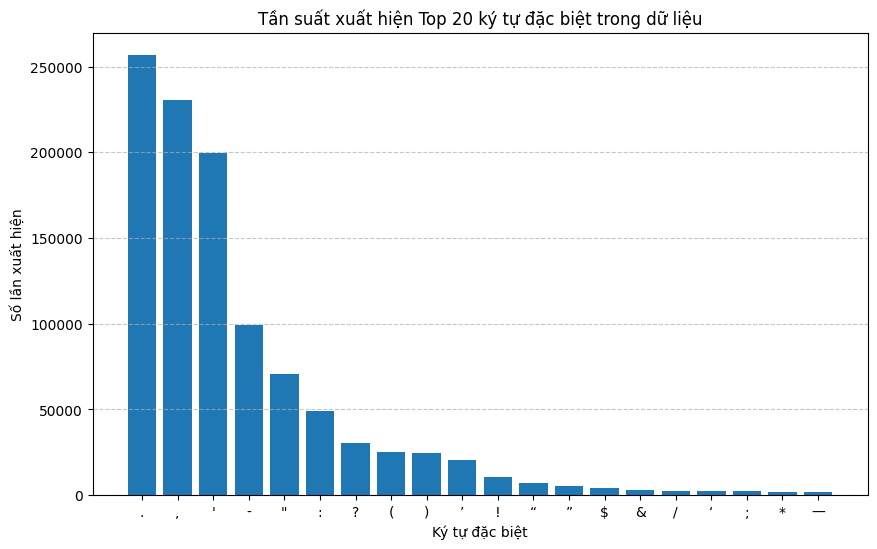

In [ ]:
# text content in the 'headline' + 'short_description'
text = ' '.join(df['headline'].astype(str) + ' ' + df['short_description'].astype(str))

# special characters (not letters, digits, or whitespace)
special_chars = re.findall(r'[^\w\s]', text)
diff_special_chars = set(special_chars)
print(len(diff_special_chars))
print(diff_special_chars)


# Count each character
special_char_counts = Counter(special_chars)


# display table
chars, counts = zip(*special_char_counts.most_common(20))
plt.figure(figsize=(10, 6))
plt.bar(chars, counts)
plt.title("Top 20 Most Frequent Special Characters in the Dataset")
plt.xlabel("Special Characters")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Word frequency

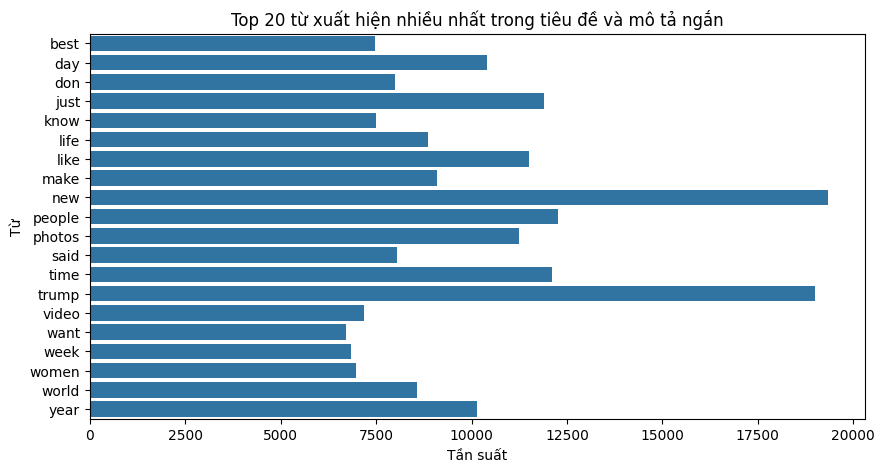

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['headline']+ df['short_description'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

plt.figure(figsize=(10,5))
sns.barplot(x=list(word_freq.values()), y=list(word_freq.keys()))
plt.title('Top 20 most frequent words in the headlines and short descriptions.')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

## Text length based on the number of words in a headline and description.

In [ ]:
def bieu_do_tan_suat(category_counts):
  category_counts = category_counts.value_counts()
  # tao bieu do
  plt.figure(figsize=(10, 6))
  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
  plt.title('Topic frequency.')
  plt.xlabel('Topic')
  plt.ylabel ('Frequencyt')
  plt.xticks(rotation=90)
  plt.show()

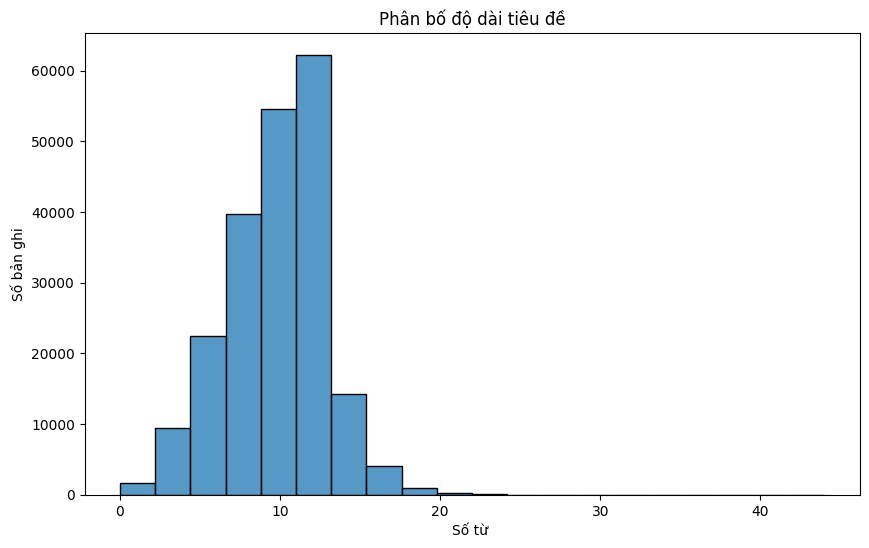

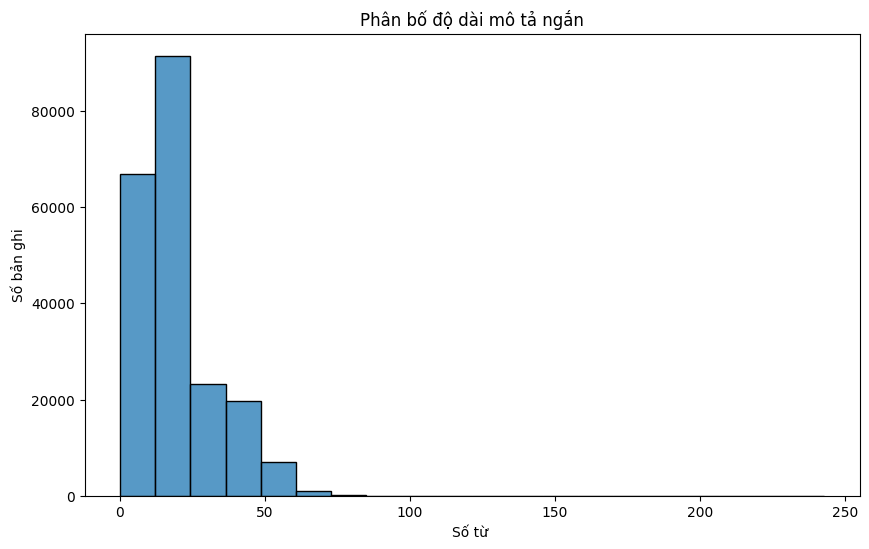

In [ ]:
# Count the number of words in the headline and description
df['headline_len'] = df['headline'].apply(lambda x: len(str(x).split()))
df['desc_len'] = df['short_description'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,6))
sns.histplot(df['headline_len'], bins=20, kde=False)
plt.title('Distribution of headline lengths')
plt.xlabel('Number of words')
plt.ylabel('Number of records')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['desc_len'], bins=20, kde=False)
plt.title('Distribution of short desc lengths')
plt.xlabel('Number of words')
plt.ylabel('Number of records')
plt.show()


short desc lengths table

In [ ]:
import pandas as pd

df['headline_len'] = df['headline'].apply(lambda x: len(str(x).split()))
df['desc_len'] = df['short_description'].apply(lambda x: len(str(x).split()))

# create table
stats = pd.DataFrame({
    'Trường văn bản': ['Tiêu đề (headline)', 'Mô tả ngắn (short_description)'],
    'Số mẫu (count)': [df['headline_len'].count(), df['desc_len'].count()],
    'Trung bình (mean)': [df['headline_len'].mean(), df['desc_len'].mean()],
    'Ngắn nhất (min)': [df['headline_len'].min(), df['desc_len'].min()],
    'Dài nhất (max)': [df['headline_len'].max(), df['desc_len'].max()]
})

stats = stats.round(2)

# display
stats

,Trường văn bản,Số mẫu (count),Trung bình (mean),Ngắn nhất (min),Dài nhất (max)
0,Tiêu đề (headline),209527,9.60,0,44
1,Mô tả ngắn (short_description),209527,19.67,0,243


In [ ]:
mask_invalid = df['headline'].str.strip().eq('') | df['headline'].str.match(r'^[^\w]*$')
invalid_rows = df[mask_invalid]
print(f"Tổng số tiêu đề không hợp lệ: {len(invalid_rows)}")
display(invalid_rows[['headline', 'category']])

mask_invalid2 = df['short_description'].str.strip().eq('') | df['short_description'].str.match(r'^[^\w]*$')
invalid_rows2 = df[mask_invalid2]
print(f"Tổng số mô tả không hợp lệ: {len(invalid_rows2)}")
display(invalid_rows2[['short_description', 'category']])

Tổng số tiêu đề không hợp lệ: 6


,headline,category
90944,,POLITICS
95567,,RELIGION
103675,,WORLDPOST
109100,,BUSINESS
110153,,MEDIA
122145,,QUEER VOICES


Tổng số mô tả không hợp lệ: 20000


,short_description,category
7998,😱😱😱😱😱😱,POLITICS
8815,😻😻😻,WEIRD NEWS
10098,💕,ENTERTAINMENT
10636,👑👑👑,ENTERTAINMENT
15668,🔥💘🔥💘🔥,WOMEN
...,...,...
206924,,QUEER VOICES
206939,,ENVIRONMENT
208803,,IMPACT
208865,,QUEER VOICES


## Topic frequency chart

/tmp/ipython-input-1584845582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


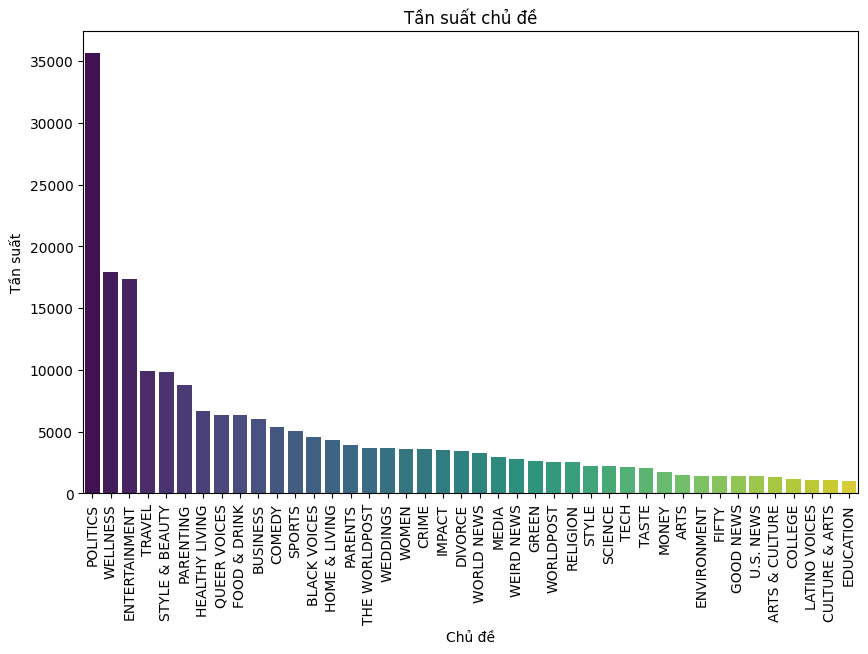

In [ ]:
bieu_do_tan_suat(df['category'])

In [ ]:
print(df['category'].unique())

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


## Language and features.

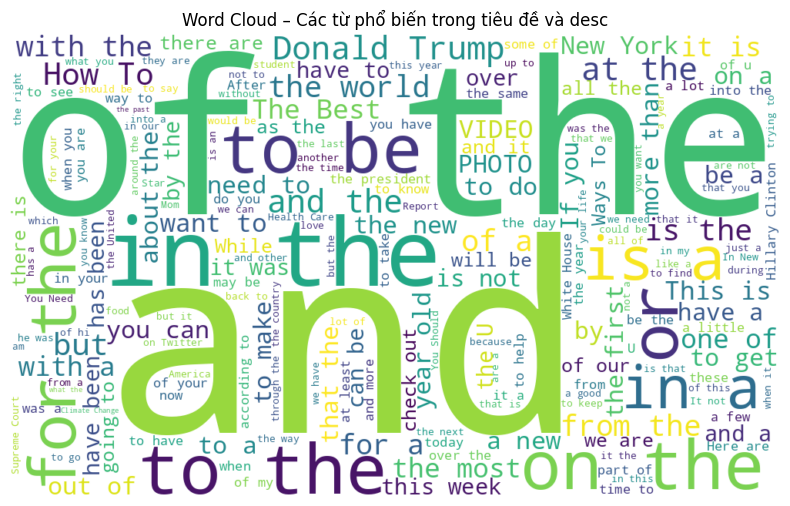

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, background_color='white', stopwords='english').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud – Các từ phổ biến trong tiêu đề và desc')
plt.show()

# Data preprocessing

## features

In [ ]:
df = df[['headline', 'category', 'short_description']]
df.shape

(209527, 3)

## Duplicate data

In [ ]:
#kiểm tra
print("Số dòng ban đầu:", len(df))
df = df.drop_duplicates(subset=['category', 'headline', 'short_description'])
print("Số dòng sau khi loại trùng:", len(df))


Số dòng ban đầu: 209527
Số dòng sau khi loại trùng: 209056


## Text normalization

In [ ]:
from bs4 import BeautifulSoup
def preprocess(q):
    # lower + xóa kí tự đặc biệt
    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')


    # Replacing some numbers with string equivalents
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q
df['headline'] = df['headline'].apply(preprocess)
df['short_description'] = df['short_description'].apply(preprocess)

<>:162: SyntaxWarning: invalid escape sequence '\W'
<>:162: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-4172075250.py:162: SyntaxWarning: invalid escape sequence '\W'
  pattern = re.compile('\W')
/tmp/ipython-input-4172075250.py:158: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    

In [ ]:
df.head(5)

,headline,category,short_description
0,over 4 million americans roll up sleeves for o...,U.S. NEWS,health experts said it is too early to predict...
1,american airlines flyer charged banned for li...,U.S. NEWS,he was subdued by passengers and crew when he ...
2,23 of the funniest tweets about cats and dogs ...,COMEDY,until you have a dog you do not understand wha...
3,the funniest tweets from parents this week se...,PARENTING,accidentally put grown up toothpaste on my tod...
4,woman who called cops on black bird watcher lo...,U.S. NEWS,amy cooper accused investment firm franklin te...


## remove stopword

In [ ]:
import nltk
from nltk.corpus import stopwords

# Tải danh sách stopwords tiếng Anh
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Chuyển chữ thường
    text = text.lower()
    # Loại bỏ ký tự đặc biệt, số, dấu câu
    text = re.sub(r'[^a-z\s]', '', text)
    # Loại bỏ stopwords
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Áp dụng cho cột văn bản
df['headline'] = df['headline'].apply(clean_text)
df['short_description'] = df['short_description'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Hàm chuyển POS tag của NLTK sang định dạng wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return ' '.join([
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in pos_tags
    ])

# Áp dụng cho các cột văn bản
df['headline'] = df['headline'].apply(lemmatize_text)
df['short_description'] = df['short_description'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Label normalization

In [ ]:
mapping = {
    'U.S. NEWS': 'NEWS', 'WORLD NEWS': 'NEWS', 'WORLDPOST': 'NEWS', 'THE WORLDPOST': 'NEWS',
    'POLITICS': 'POLITICS',
    'BUSINESS': 'BUSINESS', 'MONEY': 'BUSINESS',
    'TECH': 'TECH',
    'SCIENCE': 'SCIENCE & ENVIRONMENT', 'ENVIRONMENT': 'SCIENCE & ENVIRONMENT', 'GREEN': 'SCIENCE & ENVIRONMENT',
    'SPORTS': 'SPORTS',
    'ENTERTAINMENT': 'ENTERTAINMENT', 'COMEDY': 'ENTERTAINMENT',
    'CULTURE & ARTS': 'ENTERTAINMENT', 'ARTS': 'ENTERTAINMENT', 'ARTS & CULTURE': 'ENTERTAINMENT', 'MEDIA': 'ENTERTAINMENT',
    'WELLNESS': 'LIFESTYLE', 'HEALTHY LIVING': 'LIFESTYLE',
    'STYLE & BEAUTY': 'LIFESTYLE', 'STYLE': 'LIFESTYLE',
    'TASTE': 'FOOD & DRINK', 'FOOD & DRINK': 'FOOD & DRINK',
    'PARENTING': 'PARENTING', 'PARENTS': 'PARENTING',
    'EDUCATION': 'EDUCATION', 'COLLEGE': 'EDUCATION',
    'TRAVEL': 'TRAVEL',
    'HOME & LIVING': 'HOME & LIVING',
    'WOMEN': 'IDENTITY', 'BLACK VOICES': 'IDENTITY', 'LATINO VOICES': 'IDENTITY', 'QUEER VOICES': 'IDENTITY',
    'RELIGION': 'RELIGION',
    'CRIME': 'CRIME',
    'WEIRD NEWS': 'SPECIAL NEWS', 'GOOD NEWS': 'SPECIAL NEWS', 'IMPACT': 'SPECIAL NEWS',
    'WEDDINGS': 'RELATIONSHIPS', 'DIVORCE': 'RELATIONSHIPS',
    'FIFTY': 'LIFESTYLE'
}

df['category'] = df['category'].replace(mapping)

## Data refinement
headline and description contain only whitespace

In [ ]:
# Create conditions
invalid_headline = df['headline'].str.strip().eq('')
invalid_desc = df['short_description'].str.strip().eq('')

mask_invalid = invalid_headline & invalid_desc

# filter
invalid_rows = df[mask_invalid]

print(f"Tổng số bản ghi có headline và short_description không hợp lệ: {len(invalid_rows)}")
display(invalid_rows[['headline', 'short_description', 'category']])

Tổng số bản ghi có CẢ headline và short_description không hợp lệ: 16


,headline,short_description,category
86508,,,ENTERTAINMENT
90944,,,POLITICS
98808,,,ENTERTAINMENT
101055,,,ENTERTAINMENT
103675,,,NEWS
109100,,,BUSINESS
110153,,,ENTERTAINMENT
113992,,,SCIENCE & ENVIRONMENT
114414,,,LIFESTYLE
115562,,,LIFESTYLE


In [ ]:
mask_invalid = (df['headline'].str.strip() == '') & (df['short_description'].str.strip() == '')

num_invalid = mask_invalid.sum()
print(f"Số lượng bản ghi bị xóa: {num_invalid} (≈ {num_invalid/len(df)*100:.2f}% dữ liệu)")

# remove
df = df[~mask_invalid].reset_index(drop=True)

print("Số lượng bản ghi còn lại: ")

df.shape

Số lượng bản ghi bị xóa: 16 (≈ 0.01% dữ liệu)
Số lượng bản ghi còn lại: 


(209040, 3)

/tmp/ipython-input-1584845582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


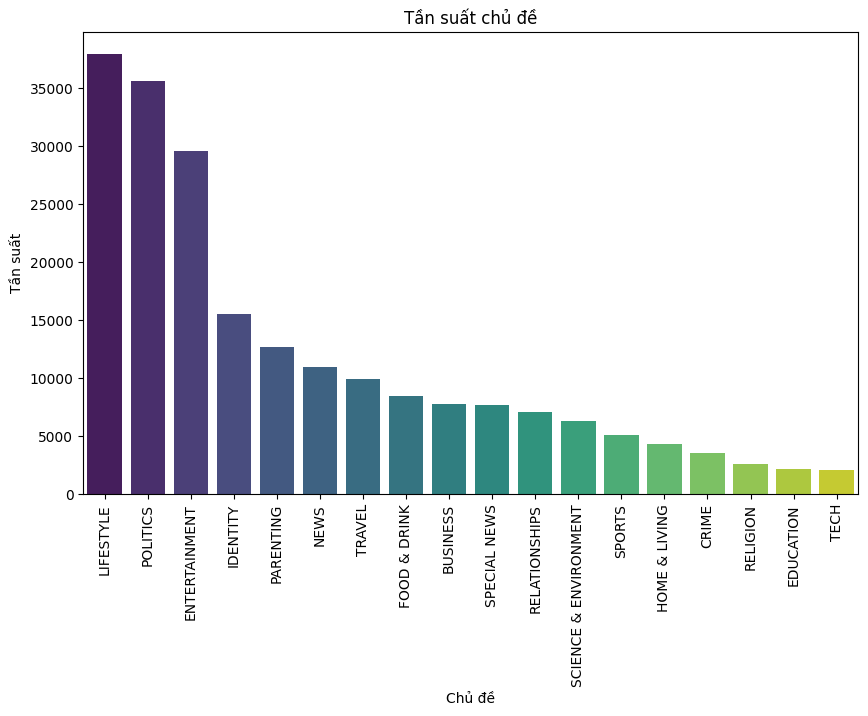

In [ ]:
bieu_do_tan_suat(df['category'])

In [ ]:
df = df[['clean_text','category']]
df.head()

,clean_text,category
0,million american roll sleeve omicron target co...,NEWS
1,american airline flyer charge ban life punch f...,NEWS
2,funny tweet cat dog week sept dog understand c...,ENTERTAINMENT
3,funny tweet parent week sept accidentally put ...,PARENTING
4,woman call cop black bird watcher lose lawsuit...,NEWS


In [ ]:
df.to_csv("cleaned_data.csv", index=False, encoding="utf-8")